In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path="C:\\Users\\craig\\Documents\\Python Scripts\\Notebooks\\Loan_Data_Classification\\Data"
os.chdir(path) 

In [3]:
n = 30  # every 10th line = 10% of the lines
df = pd.read_csv('Lending_Tree_Cleaned.csv', header=0, index_col=0,skiprows=lambda i: i % n != 0)
#df = pd.read_csv('appl_accepted_20072019Q3.csv')

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,disbursement_method,dti,dti_joint,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,grade,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,loan_amnt,loan_status,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_mths_since_last_major_derog,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,verification_status_joint,zip_code,good_bad
29,0.0,12.0,MN,61.0,68000.0,5693.51,Individual,1028.0,3398.0,71.7,0.0,0.0,0.0,0.0,Cash,10.29,0.0,1991-06-01,5.0,664.0,660.0,18000.0,D,RENT,65.0,w,1.0,0.0,0.0,461.50,18.45,18000.0,Current,2851.0,74.0,321.0,13.0,13.0,0.0,226.0,226.0,51.0,22.0,13.0,202.0,13.0,202.0,0.0,7.0,9.0,9.0,10.0,3.0,12.0,13.0,9.0,13.0,0.0,0.0,0.0,0.0,13.0,0.0,1.0,0.0,1.0,0.0,11.0,100.0,33.3,7.0,0.0,credit_card,8736.0,0.0,58.6,0.0,0.0,1934-03-01,544.0,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,D2,7.0,60 months,Credit card refinancing,0.0,13364.0,22048.0,16.0,13364.0,4628.0,12000.0,0.0,7148.0,14900.0,Source Verified,none,550xx,1
59,0.0,4.0,CT,39.0,89206.0,5693.51,Individual,7434.0,1167.0,82.6,0.0,0.0,0.0,0.0,Cash,5.80,0.0,2012-07-01,4.0,704.0,700.0,9000.0,C,RENT,43.0,w,0.0,1.0,1.0,305.77,13.58,9000.0,Current,4883.0,67.0,68.0,2.0,2.0,0.0,226.0,226.0,127.0,23.0,58.0,202.0,5.0,202.0,0.0,2.0,3.0,2.0,2.0,2.0,5.0,6.0,3.0,7.0,0.0,0.0,0.0,3.0,7.0,3.0,2.0,0.0,1.0,3.0,3.0,100.0,50.0,0.0,0.0,credit_card,5663.0,0.0,38.0,0.0,0.0,1934-03-01,544.0,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,C2,0.0,36 months,Credit card refinancing,0.0,52038.0,66900.0,8.0,52038.0,46375.0,6700.0,0.0,52000.0,14900.0,Verified,none,060xx,1
89,0.0,3.0,ME,0.0,52000.0,5693.51,Individual,74761.0,711140.0,0.0,0.0,0.0,0.0,0.0,Cash,0.00,0.0,1992-06-01,11.0,754.0,750.0,3000.0,B,OWN,0.0,w,1.0,0.0,0.0,99.62,11.98,3000.0,Current,0.0,121.0,309.0,81.0,14.0,2.0,226.0,226.0,127.0,14.0,661.0,202.0,14.0,202.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,debt_consolidation,0.0,0.0,0.0,0.0,0.0,1934-03-01,544.0,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,B5,0.0,36 months,Debt consolidation,0.0,74761.0,80000.0,13.0,0.0,0.0,0.0,2.0,0.0,0.0,Source Verified,none,042xx,1
119,0.0,0.0,IL,69.0,25000.0,5693.51,Individual,2197.0,2611.0,80.8,0.0,0.0,0.0,0.0,Cash,19.30,0.0,1997-07-01,0.0,714.0,710.0,20000.0,D,OWN,0.0,w,1.0,1.0,1.0,502.12,17.47,20000.0,Current,7850.0,134.0,248.0,34.0,34.0,0.0,226.0,226.0,127.0,129.0,95.0,202.0,5.0,202.0,0.0,3.0,5.0,3.0,4.0,2.0,7.0,10.0,5.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,66.7,0.0,0.0,debt_consolidation,15380.0,0.0,69.0,0.0,0.0,1934-03-01,544.0,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,D1,0.0,60 months,Debt consolidation,0.0,15380.0,22300.0,12.0,15380.0,0.0,13600.0,0.0,0.0,22300.0,Not Verified,none,610xx,

In [6]:
df = df.drop('loan_status', axis=1)

In [7]:
from pycaret.classification import *

In [8]:
df = df.drop(['zip_code', 'title' ], axis=1, errors='ignore')

In [9]:
exp_reg = setup(data = df, target = 'good_bad', session_id=100, fix_imbalance=True)
#fixed imbalance -- runs smooth algorithm
#'Fix Imbalance Method' -- SMOTE

Setup Succesfully Completed!


,Description,Value
0,session_id,100
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(45774, 103)"
4,Missing Values,False
5,Numeric Features,89
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.8981,0.7185,0.9986,0.8991,0.9462,0.0137,0.0472,5.6527
1,Gradient Boosting Classifier,0.8980,0.7047,0.9988,0.8989,0.9462,0.0098,0.0400,147.3618
2,Extra Trees Classifier,0.8978,0.6948,0.9982,0.8992,0.9461,0.0157,0.0530,23.2438
3,Extreme Gradient Boosting,0.8978,0.7051,0.9986,0.8988,0.9461,0.0085,0.0333,13.6830
4,CatBoost Classifier,0.8977,0.7255,0.9969,0.9000,0.9460,0.0297,0.0757,93.1876
5,Ada Boost Classifier,0.8908,0.6779,0.9853,0.9022,0.9419,0.0626,0.0902,55.6695
6,Random Forest Classifier,0.8794,0.6236,0.9712,0.9021,0.9354,0.0553,0.0655,1.1838
7,Decision Tree Classifier,0.8146,0.5311,0.8868,0.9049,0.8957,0.0577,0.0580,6.2652
8,Ridge Classifier,0.6767,0.0000,0.6790,0.9459,0.7905,0.1592,0.2116,0.3416
9,Linear Discriminant Analysis,0.6767,0.7321,0.6793,0.9456,0.7906,0.1585,0.2107,3.8196


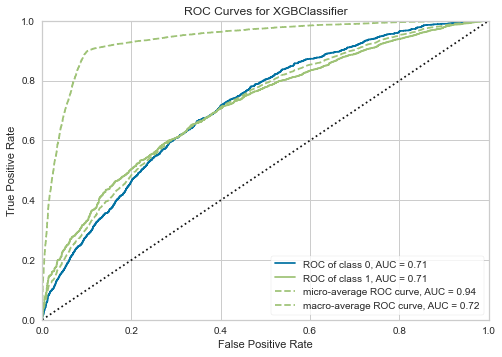

In [11]:
xgb = create_model('xgboost')

plot_model(xgb)

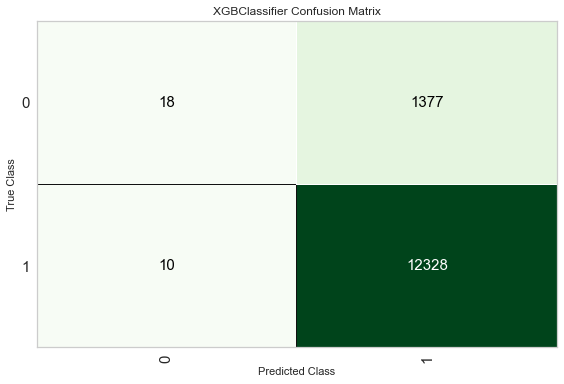

In [12]:
plot_model(xgb, plot='confusion_matrix')

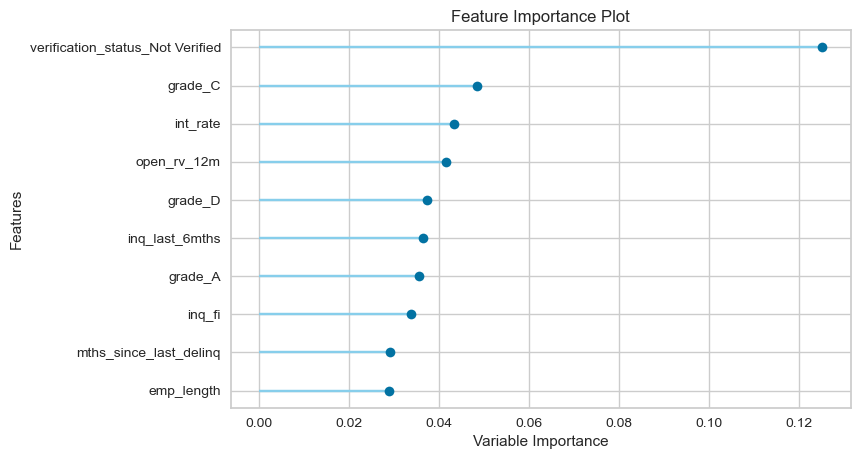

In [13]:
plot_model(xgb, plot='feature')

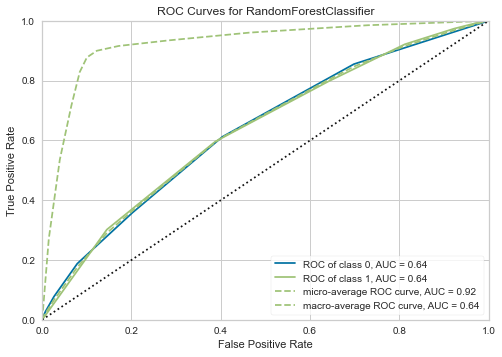

In [14]:
rf = create_model('rf')

plot_model(rf)

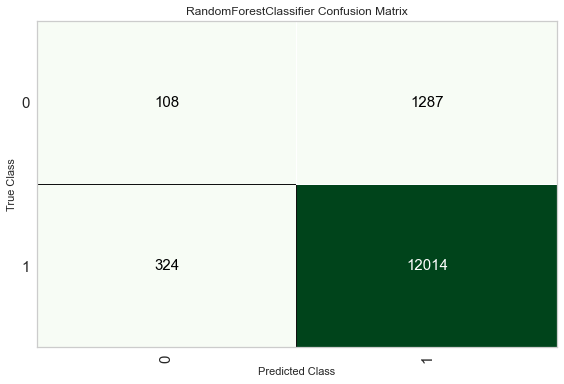

In [15]:
plot_model(rf, plot='confusion_matrix')

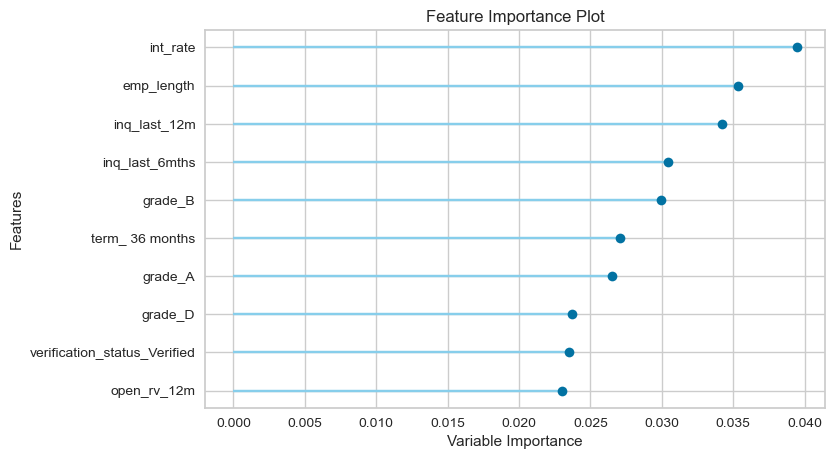

In [16]:
plot_model(rf, plot='feature')

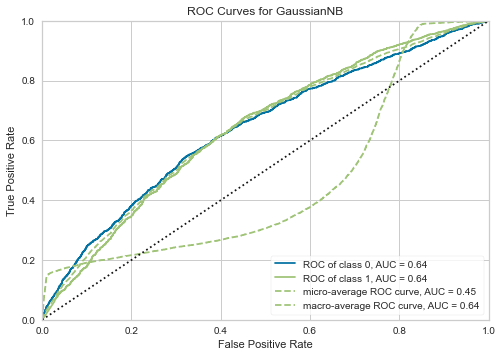

In [17]:
nb = create_model('nb')

plot_model(nb)

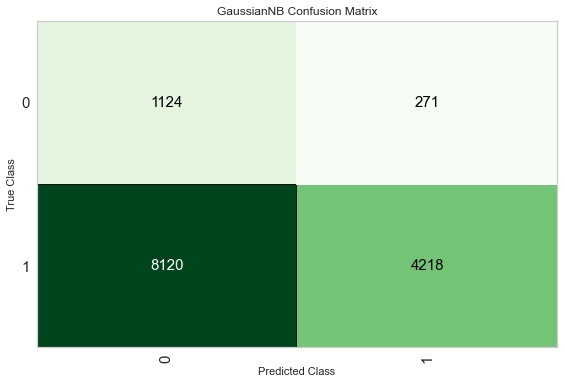

In [18]:
plot_model(nb, plot='confusion_matrix')

In [21]:
ridge = create_model('ridge')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6771,0.0000,0.6818,0.9428,0.7914,0.1520,0.2007
1,0.6742,0.0000,0.6784,0.9430,0.7891,0.1499,0.1991
2,0.6742,0.0000,0.6770,0.9447,0.7887,0.1543,0.2057
3,0.6738,0.0000,0.6749,0.9469,0.7881,0.1595,0.2136
4,0.6888,0.0000,0.6916,0.9481,0.7998,0.1726,0.2263
5,0.6773,0.0000,0.6777,0.9485,0.7905,0.1657,0.2214
6,0.6726,0.0000,0.6758,0.9437,0.7876,0.1516,0.2019
7,0.6632,0.0000,0.6616,0.9477,0.7792,0.1556,0.2122
8,0.6857,0.0000,0.6862,0.9500,0.7969,0.1760,0.2326
9,0.6798,0.0000,0.6849,0.9431,0.7935,0.1544,0.2030


NameError: name 'plot' is not defined

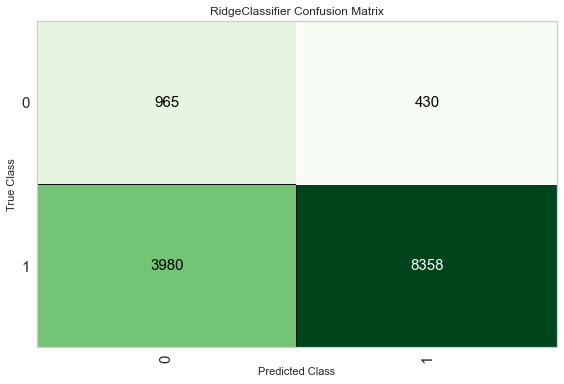

In [23]:
plot_model(ridge, plot='confusion_matrix')

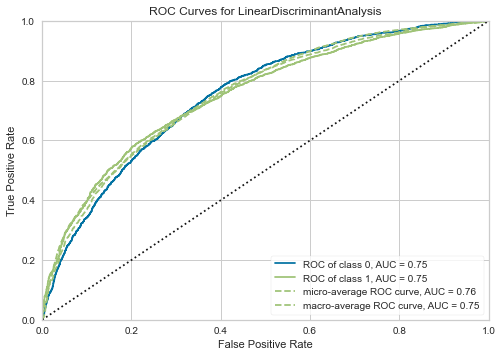

In [26]:
lda = create_model('lda')

plot_model(lda)

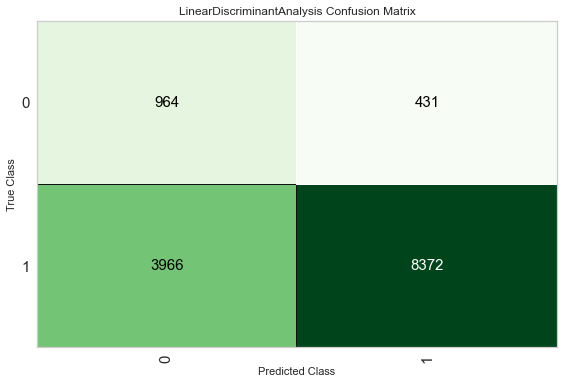

In [27]:
plot_model(lda, plot='confusion_matrix')

In [30]:
tuned_lda = tune_model(lda, optimize = 'Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4184,0.5622,0.3873,0.9177,0.5447,0.0247,0.0502
1,0.4260,0.5511,0.4005,0.9107,0.5563,0.0165,0.0326
2,0.4263,0.5518,0.4001,0.9121,0.5563,0.0183,0.0362
3,0.4276,0.5244,0.4060,0.9041,0.5604,0.0077,0.0151
4,0.4501,0.5141,0.4314,0.9086,0.5850,0.0153,0.0286
5,0.4201,0.5521,0.3883,0.9202,0.5462,0.0275,0.0559
6,0.4345,0.5411,0.4100,0.9119,0.5657,0.0191,0.0372
7,0.4295,0.5456,0.4048,0.9102,0.5604,0.0164,0.0321
8,0.4292,0.5477,0.4031,0.9127,0.5592,0.0196,0.0387
9,0.4245,0.5331,0.3975,0.9123,0.5537,0.0187,0.0372


In [32]:
tuned_rf = tune_model(rf, optimize = 'Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8864,0.6516,0.9805,0.9016,0.9394,0.0544,0.0720
1,0.8870,0.6242,0.9851,0.8989,0.9400,0.0057,0.0087
2,0.8883,0.6176,0.9847,0.9003,0.9406,0.0294,0.0431
3,0.8898,0.6359,0.9847,0.9017,0.9414,0.0532,0.0756
4,0.8904,0.6616,0.9847,0.9023,0.9417,0.0626,0.0879
5,0.8898,0.6304,0.9861,0.9007,0.9415,0.0367,0.0550
6,0.8917,0.6414,0.9868,0.9019,0.9424,0.0617,0.0906
7,0.8898,0.6426,0.9868,0.9002,0.9415,0.0330,0.0506
8,0.8892,0.6438,0.9847,0.9011,0.9411,0.0482,0.0691
9,0.8923,0.6337,0.9892,0.9007,0.9429,0.0423,0.0684
